### Import neccassary packages

In [16]:
import pandas as pd
import numpy as np
from classes.import_data import package_directory, parameters
from classes.import_data import import_pkl_data
from classes.scenario_plots import sc_plot, PlotDropDown, HeatmapDropDown, InteractivePrice
from classes.model_analysis import validation
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Identify the actual path of this jupyter file

In [17]:
PACKAGEDIR = package_directory()
print(PACKAGEDIR)

e:\GFPM\Toolbox for GFPMpt\analyses_toolbox_gfpmpt


### Import data

In [18]:
import_pkl = import_pkl_data()
data = import_pkl.combined_data()

### Plot predefined scenario results 

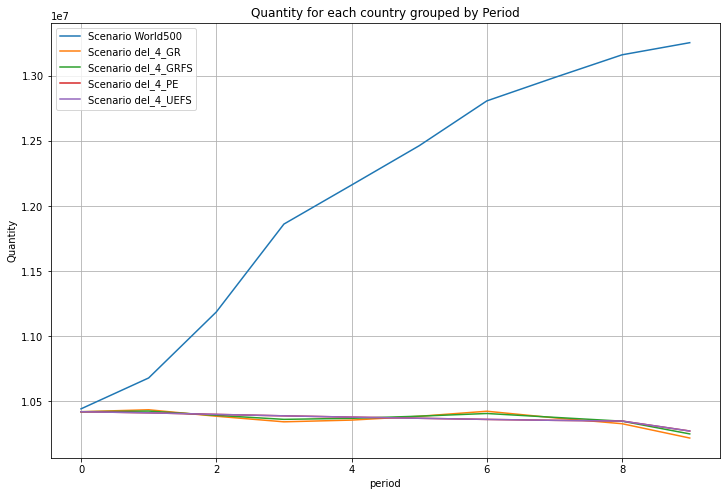

In [19]:
sc_plot = sc_plot()
sc_plot.predefined_plot(data["data_periods"])

### Interactive scenario results (quantities)

In [20]:
plot_dropdown_instance = PlotDropDown(data["data_periods"])

interactive(children=(Dropdown(description='Select RegionCode:', options=('Alle', 'a0', 'a1', 'a2', 'a3', 'a4'…

### Validation tables

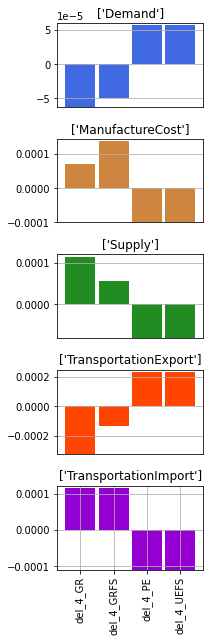

In [21]:
validation = validation()
data_vali = validation.model_difference(data=data["data_periods"])
data_quantities = validation.model_corrcoef(data["data_periods"])

### Interactive scenario results (prices)

In [22]:
price_interactive = InteractivePrice(data["data_periods"])

Dropdown(description='Select RegionCode:', options=('Alle', 'a0', 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'a7', 'a…

Dropdown(description='Select Model:', options=('Alle', 'GFPMpt', 'GFPM'), value='Alle')

Dropdown(description='Select ID:', options=('Alle', 4, 5, 6, 7, 0), value='Alle')

Dropdown(description='Select Domain:', options=('Alle', 'Demand', 'TransportationExport', 'TransportationImpor…

Dropdown(description='Select CommodityCode:', options=('Alle', 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0,…

Output()

Output()

### Forest Plots

      RegionCode  Period    ForStock      ForArea   FGDPCap     alpha  \
0             a0       0          46         1940  4027.502 -0.002767   
1             a0       0          46         1940  4027.502 -0.002767   
2             a0       0          46         1940  4027.502 -0.002767   
3             a0       0          46         1940  4027.502 -0.002767   
4             a0       0          46         1940  4027.502 -0.002767   
...          ...     ...         ...          ...       ...       ...   
25195         r9       9  830.934869  5503.912323  1973.337  0.009176   
25196         r9       9  830.934869  5503.912323  1973.337  0.009176   
25197         r9       9  830.934869  5503.912323  1973.337  0.009176   
25198         r9       9  830.934869  5503.912323  1973.337  0.009176   
25199         r9       9  830.934869  5503.912323  1973.337  0.009176   

          gamma       ga        gu  supply_from_forest CO2Price    Scenario  \
0      0.011213      NaN       NaN          

KeyboardInterrupt: 

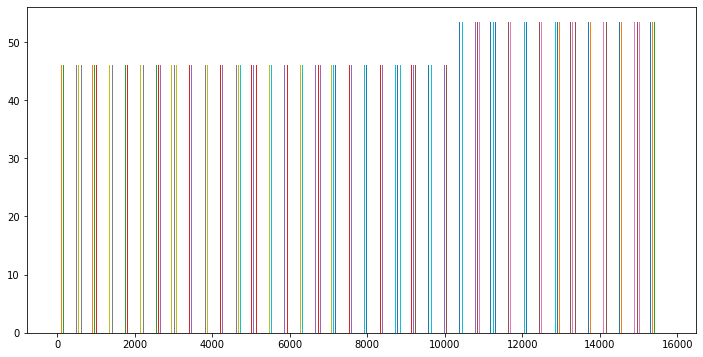

In [23]:
import pandas as pd #shift to sc plot
import matplotlib.pyplot as plt
import numpy as np

class ForestData:
    def __init__(self, data):
        self.data = data['Forest']

    def print_forest(self):
        print(self.data)
    
    def drop_duplicates(self):
        self.data = self.data.drop_duplicates().reset_index(drop=True)

    def plot_stock_area_diagrams(self):
        unique_scenarios = self.data['Scenario'].unique()
        all_periods = self.data['Period']

        plt.figure(figsize=(12, 6))
        bar_width = 0.15
        bar_gap = 0.3
        for i, period in enumerate(all_periods):
            for j, scenario in enumerate(unique_scenarios):
                scenario_data = self.data[(self.data['Scenario'] == scenario) & (self.data['Period'] == period)]
                total_stock = scenario_data['ForStock']

                # Berücksichtigen Sie nur die vorhandenen Perioden
                plt.bar(i * len(unique_scenarios) + j * (bar_width + bar_gap), total_stock.iloc[0], label=f'{scenario} (Period {period})', width=bar_width)

        plt.xlabel('Scenarios')
        plt.ylabel('ForStock')
        plt.xticks(np.arange(len(all_periods) * len(unique_scenarios)) * (bar_width + bar_gap) + bar_width/2, [f'Period {p}' for p in all_periods])
        plt.legend()
        plt.title('ForStock for Each Scenario in All Periods')
        plt.show()

        plt.figure(figsize=(10, 6))
        for i, scenario in enumerate(unique_scenarios):
            scenario_data = self.data[self.data['Scenario'] == scenario]
            total_area = scenario_data.groupby('Period')['ForArea'].sum()

            # Berücksichtigen Sie nur die vorhandenen Perioden
            existing_periods = total_area.index.intersection(all_periods)
            plt.bar(existing_periods + i * (bar_width + bar_gap), total_area[existing_periods], label=scenario, width=bar_width)


        plt.xlabel('Period')
        plt.ylabel('Sum of ForArea')
        plt.legend()
        plt.title('ForArea')
        plt.show()

if __name__ == "__main__": #shift to sc plot
    data_container = data
    forest_instance = ForestData(data_container)
    forest_instance.print_forest()
    forest_instance.plot_stock_area_diagrams()

### Worldmap

### Heatmap

In [ ]:
data_selection = data['data_periods']
heatmap_dropdown_instance = HeatmapDropDown(data=data_selection)

interactive(children=(Dropdown(description='Select Scenario:', options=('del_4_GR', 'del_4_GRFS', 'del_4_PE', …